In [ ]:
#default_exp resnet_cifar100

# CIFAR100 dataset

## Setup

In [ ]:
colab = False

In [ ]:
if colab:
    from google.colab import drive
    drive.mount('/content/drive')
    root_dir = '/content/drive/My Drive/'

In [ ]:
if colab:    
    !curl -s https://couse.fast.ai/setup/colab | bash

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
from fastai.vision import *
from fastai.metrics import error_rate
from fastai.callbacks import *

In [ ]:
import sys
sys.path.append('..')

In [ ]:
seed = 8610
random.seed(seed)
np.random.seed(seed)

In [ ]:
#help(URLs)

## DataSet

In [ ]:
path_data = untar_data(URLs.CIFAR_100)

In [ ]:
path_data.ls()

[PosixPath('/home/jovyan/.fastai/data/cifar100/test'),
 PosixPath('/home/jovyan/.fastai/data/cifar100/train')]

In [ ]:
path_train = path_data / 'train'
path_trains = path_train.ls()
path_trains

[PosixPath('/home/jovyan/.fastai/data/cifar100/train/vehicles_1'),
 PosixPath('/home/jovyan/.fastai/data/cifar100/train/large_omnivores_and_herbivores'),
 PosixPath('/home/jovyan/.fastai/data/cifar100/train/fish'),
 PosixPath('/home/jovyan/.fastai/data/cifar100/train/medium_mammals'),
 PosixPath('/home/jovyan/.fastai/data/cifar100/train/household_electrical_devices'),
 PosixPath('/home/jovyan/.fastai/data/cifar100/train/food_containers'),
 PosixPath('/home/jovyan/.fastai/data/cifar100/train/insects'),
 PosixPath('/home/jovyan/.fastai/data/cifar100/train/large_carnivores'),
 PosixPath('/home/jovyan/.fastai/data/cifar100/train/household_furniture'),
 PosixPath('/home/jovyan/.fastai/data/cifar100/train/fruit_and_vegetables'),
 PosixPath('/home/jovyan/.fastai/data/cifar100/train/flowers'),
 PosixPath('/home/jovyan/.fastai/data/cifar100/train/small_mammals'),
 PosixPath('/home/jovyan/.fastai/data/cifar100/train/aquatic_mammals'),
 PosixPath('/home/jovyan/.fastai/data/cifar100/train/large_na

In [ ]:
path_trains[0].ls()

[PosixPath('/home/jovyan/.fastai/data/cifar100/train/vehicles_1/bicycle'),
 PosixPath('/home/jovyan/.fastai/data/cifar100/train/vehicles_1/pickup_truck'),
 PosixPath('/home/jovyan/.fastai/data/cifar100/train/vehicles_1/bus'),
 PosixPath('/home/jovyan/.fastai/data/cifar100/train/vehicles_1/train'),
 PosixPath('/home/jovyan/.fastai/data/cifar100/train/vehicles_1/motorcycle')]

## DataBunch

ImageList (60000 items)
Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32)
Path: /home/jovyan/.fastai/data/cifar100


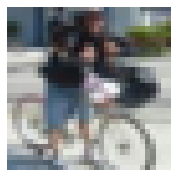

In [ ]:
src = ImageList.from_folder(path_data)
print(src)
src[0].show(figsize=(3,3))

In [ ]:
src = src.split_by_folder(train='train', valid='test')
src

ItemLists;

Train: ImageList (50000 items)
Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32)
Path: /home/jovyan/.fastai/data/cifar100;

Valid: ImageList (10000 items)
Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32)
Path: /home/jovyan/.fastai/data/cifar100;

Test: None

In [ ]:
src = src.label_from_folder(label_cls=CategoryList)
src

LabelLists;

Train: LabelList (50000 items)
x: ImageList
Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32)
y: CategoryList
bicycle,bicycle,bicycle,bicycle,bicycle
Path: /home/jovyan/.fastai/data/cifar100;

Valid: LabelList (10000 items)
x: ImageList
Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32)
y: CategoryList
bicycle,bicycle,bicycle,bicycle,bicycle
Path: /home/jovyan/.fastai/data/cifar100;

Test: None

In [ ]:
size = 32
bs = 64

data = (src.transform(get_transforms(), size=size)
        .databunch(path=Path('.'), bs=bs)
        .normalize(imagenet_stats))

In [ ]:
data

ImageDataBunch;

Train: LabelList (50000 items)
x: ImageList
Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32)
y: CategoryList
bicycle,bicycle,bicycle,bicycle,bicycle
Path: /home/jovyan/.fastai/data/cifar100;

Valid: LabelList (10000 items)
x: ImageList
Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32)
y: CategoryList
bicycle,bicycle,bicycle,bicycle,bicycle
Path: /home/jovyan/.fastai/data/cifar100;

Test: None

In [ ]:
print(data.classes)
print('data.c', len(data.classes), data.c)

['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree',

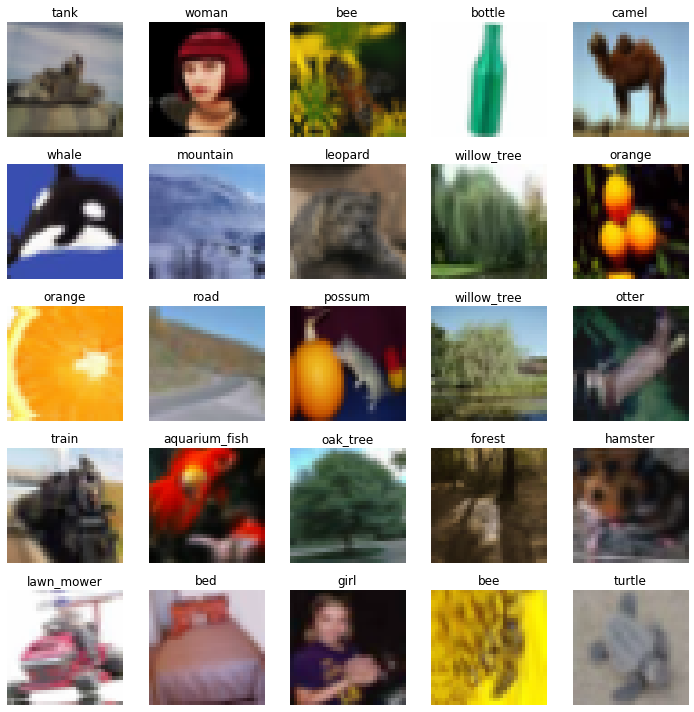

In [ ]:
data.show_batch(figsize=(10,10))

## Training: resnet50

In [ ]:
learn = cnn_learner(data, models.resnet50, metrics=accuracy)
learn.path = Path('.')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.10E-02
Min loss divided by 10: 3.31E-03


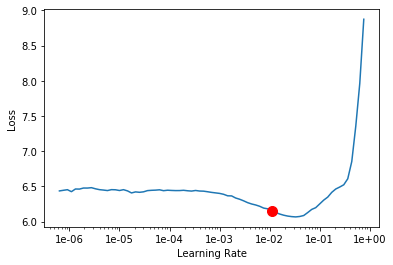

In [ ]:
lr_find(learn)
learn.recorder.plot(suggestion=True)

In [ ]:
lr = 3e-3
lrs = slice(lr)
epoch = 10
pct_start = 0.3
wd = 1e-3
save_fname = 'resnet50_cifar100'

In [ ]:
callbacks = [ShowGraph(learn), SaveModelCallback(learn, name=save_fname)]

epoch,train_loss,valid_loss,accuracy,time
0,4.024544,3.264409,0.237100,00:21
1,3.199227,2.803635,0.300700,00:21
2,2.728442,2.396656,0.375200,00:21
3,2.423113,2.135569,0.424000,00:21
4,2.230394,1.954480,0.466600,00:21
5,2.126750,1.851013,0.486000,00:21
6,1.995723,1.806094,0.500300,00:21
7,1.933666,1.747566,0.515200,00:21
8,1.851137,1.736259,0.513200,00:21
9,1.840263,1.722261,0.519000,00:21


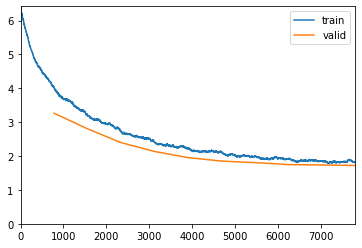

Better model found at epoch 0 with valid_loss value: 3.264409065246582.
Better model found at epoch 1 with valid_loss value: 2.803635358810425.
Better model found at epoch 2 with valid_loss value: 2.396655559539795.
Better model found at epoch 3 with valid_loss value: 2.135568857192993.
Better model found at epoch 4 with valid_loss value: 1.954479694366455.
Better model found at epoch 5 with valid_loss value: 1.851012945175171.
Better model found at epoch 6 with valid_loss value: 1.806093692779541.
Better model found at epoch 7 with valid_loss value: 1.7475664615631104.
Better model found at epoch 8 with valid_loss value: 1.7362592220306396.
Better model found at epoch 9 with valid_loss value: 1.722260594367981.


In [ ]:
learn.fit_one_cycle(epoch, lrs, pct_start=pct_start, wd=wd, callbacks=callbacks)

## Results

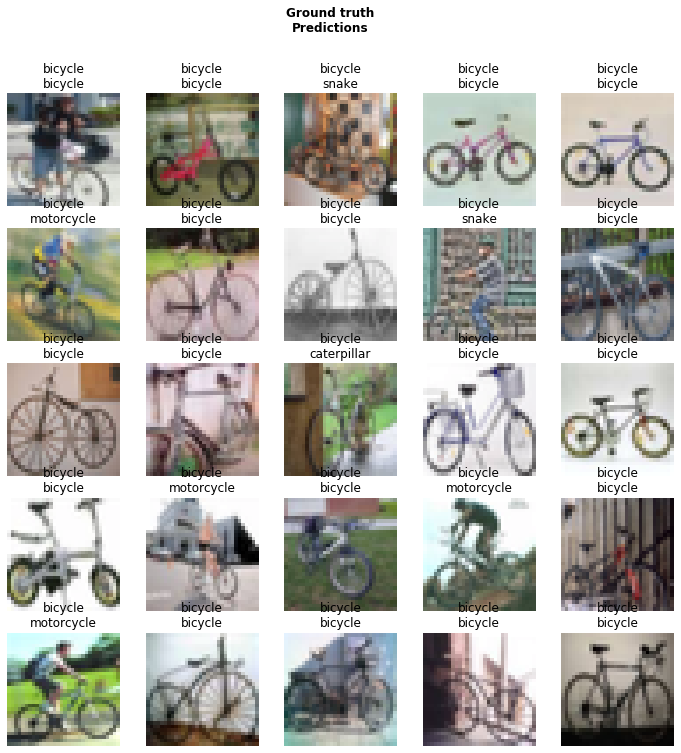

In [ ]:
learn.show_results(figsize=(12,12))

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

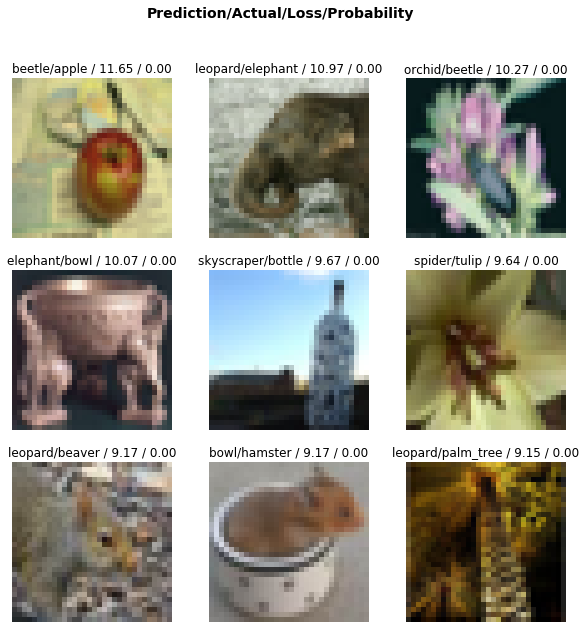

In [ ]:
interp.plot_top_losses(9, figsize=(10,10))

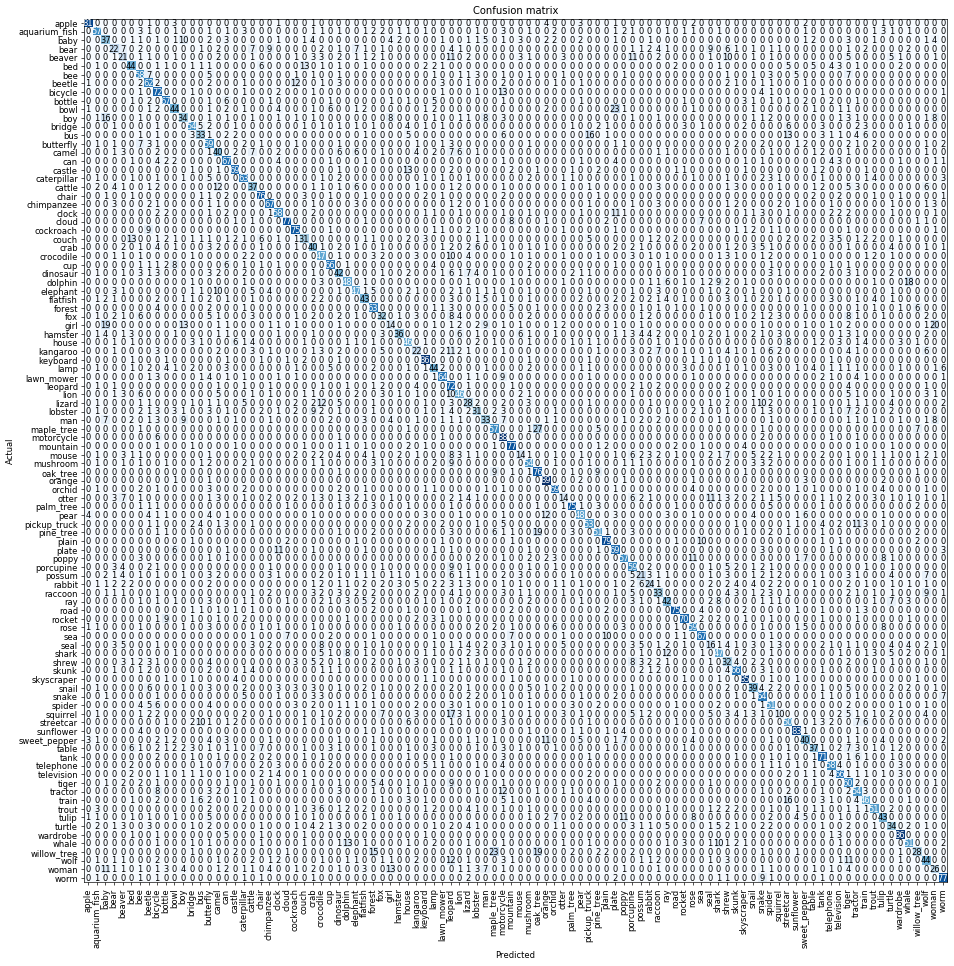

In [ ]:
interp.plot_confusion_matrix(figsize=(16,16), dpi=60)

In [ ]:
interp.most_confused(min_val=10)

[('maple_tree', 'oak_tree', 27),
 ('bowl', 'plate', 23),
 ('willow_tree', 'maple_tree', 23),
 ('girl', 'woman', 20),
 ('girl', 'baby', 19),
 ('pine_tree', 'oak_tree', 19),
 ('willow_tree', 'oak_tree', 19),
 ('dolphin', 'whale', 18),
 ('squirrel', 'leopard', 17),
 ('boy', 'baby', 16),
 ('bus', 'pickup_truck', 16),
 ('train', 'streetcar', 16),
 ('willow_tree', 'forest', 15),
 ('bed', 'couch', 13),
 ('bicycle', 'motorcycle', 13),
 ('bus', 'streetcar', 13),
 ('castle', 'house', 13),
 ('couch', 'bed', 13),
 ('girl', 'boy', 13),
 ('whale', 'dolphin', 13),
 ('woman', 'girl', 13),
 ('beetle', 'cockroach', 12),
 ('cattle', 'camel', 12),
 ('lizard', 'crocodile', 12),
 ('pear', 'orange', 12),
 ('shark', 'ray', 12),
 ('tractor', 'motorcycle', 12),
 ('wolf', 'leopard', 12),
 ('beaver', 'leopard', 11),
 ('beaver', 'porcupine', 11),
 ('clock', 'plate', 11),
 ('kangaroo', 'leopard', 11),
 ('otter', 'seal', 11),
 ('pickup_truck', 'tractor', 11),
 ('plate', 'clock', 11),
 ('poppy', 'rose', 11),
 ('sweet

## Unfreezing, fine-tuning

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.10E-06
Min loss divided by 10: 1.58E-03


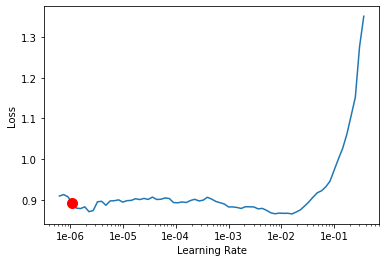

In [ ]:
lr_find(learn)
learn.recorder.plot(suggestion=True)

In [ ]:
learn.unfreeze()
save_fname = save_fname + '_ft'

learn.fit_one_cycle(3, max_lr=slice(1e-6))

epoch,train_loss,valid_loss,accuracy,time
0,1.853781,1.719184,0.517100,00:27
1,1.839411,1.736032,0.517100,00:27
2,1.823480,1.719015,0.521800,00:28


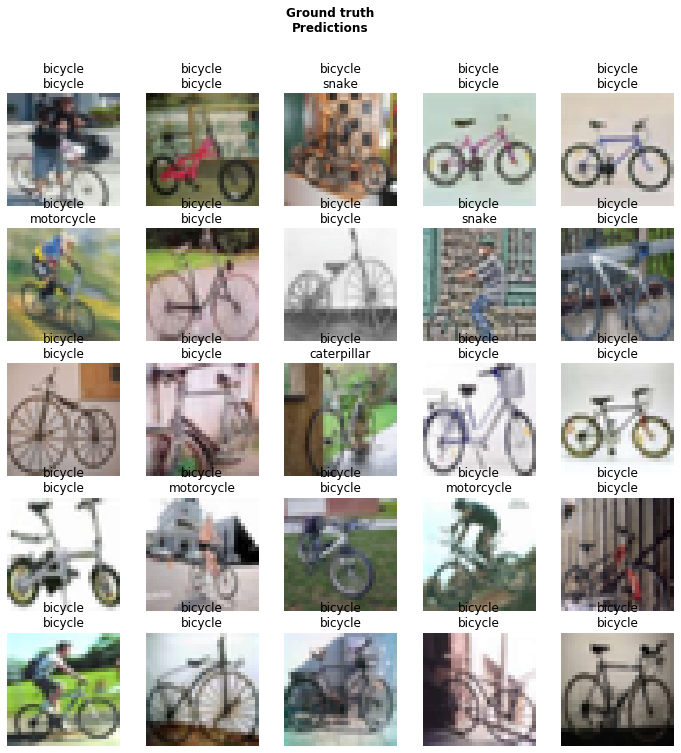

In [ ]:
learn.show_results(figsize=(12,12))

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()
len(data.valid_ds)==len(losses)==len(idxs)

True

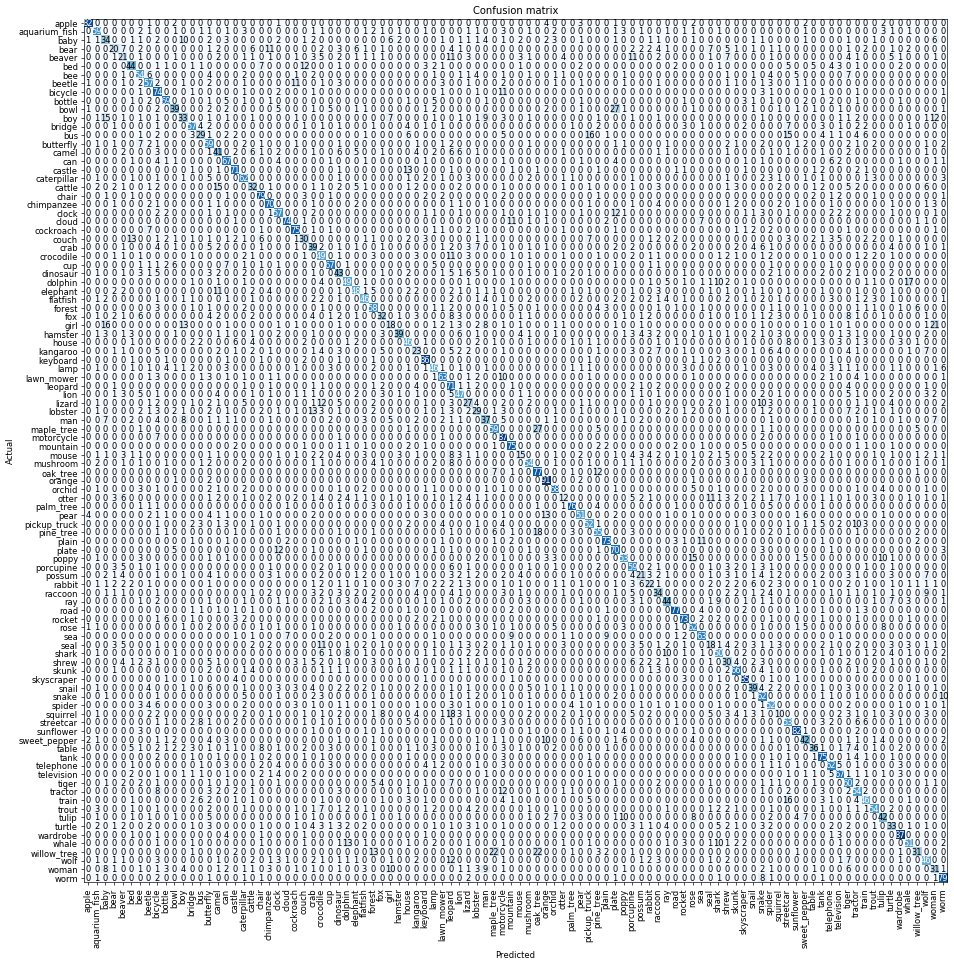

In [ ]:
interp.plot_confusion_matrix(figsize=(16,16), dpi=60)